In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [2]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [28]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [10]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(ytrain, 10)
Y_test = np_utils.to_categorical(ytest, 10)

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


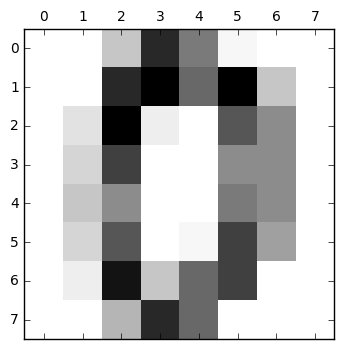

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline
print(digits.images[0])
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.models import Model

In [55]:


import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adadelta
from keras import backend as K
from keras.callbacks import EarlyStopping

input_unit_size=64
inputs = Input(shape=(input_unit_size,))
x = Dense(36, activation='relu')(inputs)
outputs = Dense(64)(x)
model = Model(input=inputs, output=outputs)
model.compile(loss='mse', optimizer='adadelta')

In [57]:
model.fit(Xtrain, Xtrain, nb_epoch=20, batch_size=8)

Epoch 1/20
1347/1347 [==============================] - 0s - loss: 4.8709     
Epoch 2/20
1347/1347 [==============================] - 0s - loss: 4.3442     
Epoch 3/20
1347/1347 [==============================] - 0s - loss: 3.9499     
Epoch 4/20
1347/1347 [==============================] - 0s - loss: 3.6451     
Epoch 5/20
1347/1347 [==============================] - 0s - loss: 3.3807     
Epoch 6/20
1347/1347 [==============================] - 0s - loss: 3.1601     
Epoch 7/20
1347/1347 [==============================] - 0s - loss: 2.9657     
Epoch 8/20
1347/1347 [==============================] - 0s - loss: 2.7961     
Epoch 9/20
1347/1347 [==============================] - 0s - loss: 2.6354     
Epoch 10/20
1347/1347 [==============================] - 0s - loss: 2.4968     
Epoch 11/20
1347/1347 [==============================] - 0s - loss: 2.3757     
Epoch 12/20
1347/1347 [==============================] - 0s - loss: 2.2723     
Epoch 13/20
1347/1347 [==========================

In [41]:
import numpy as np
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)    
    plt.imshow(data.reshape(size, size))
    plt.gray()



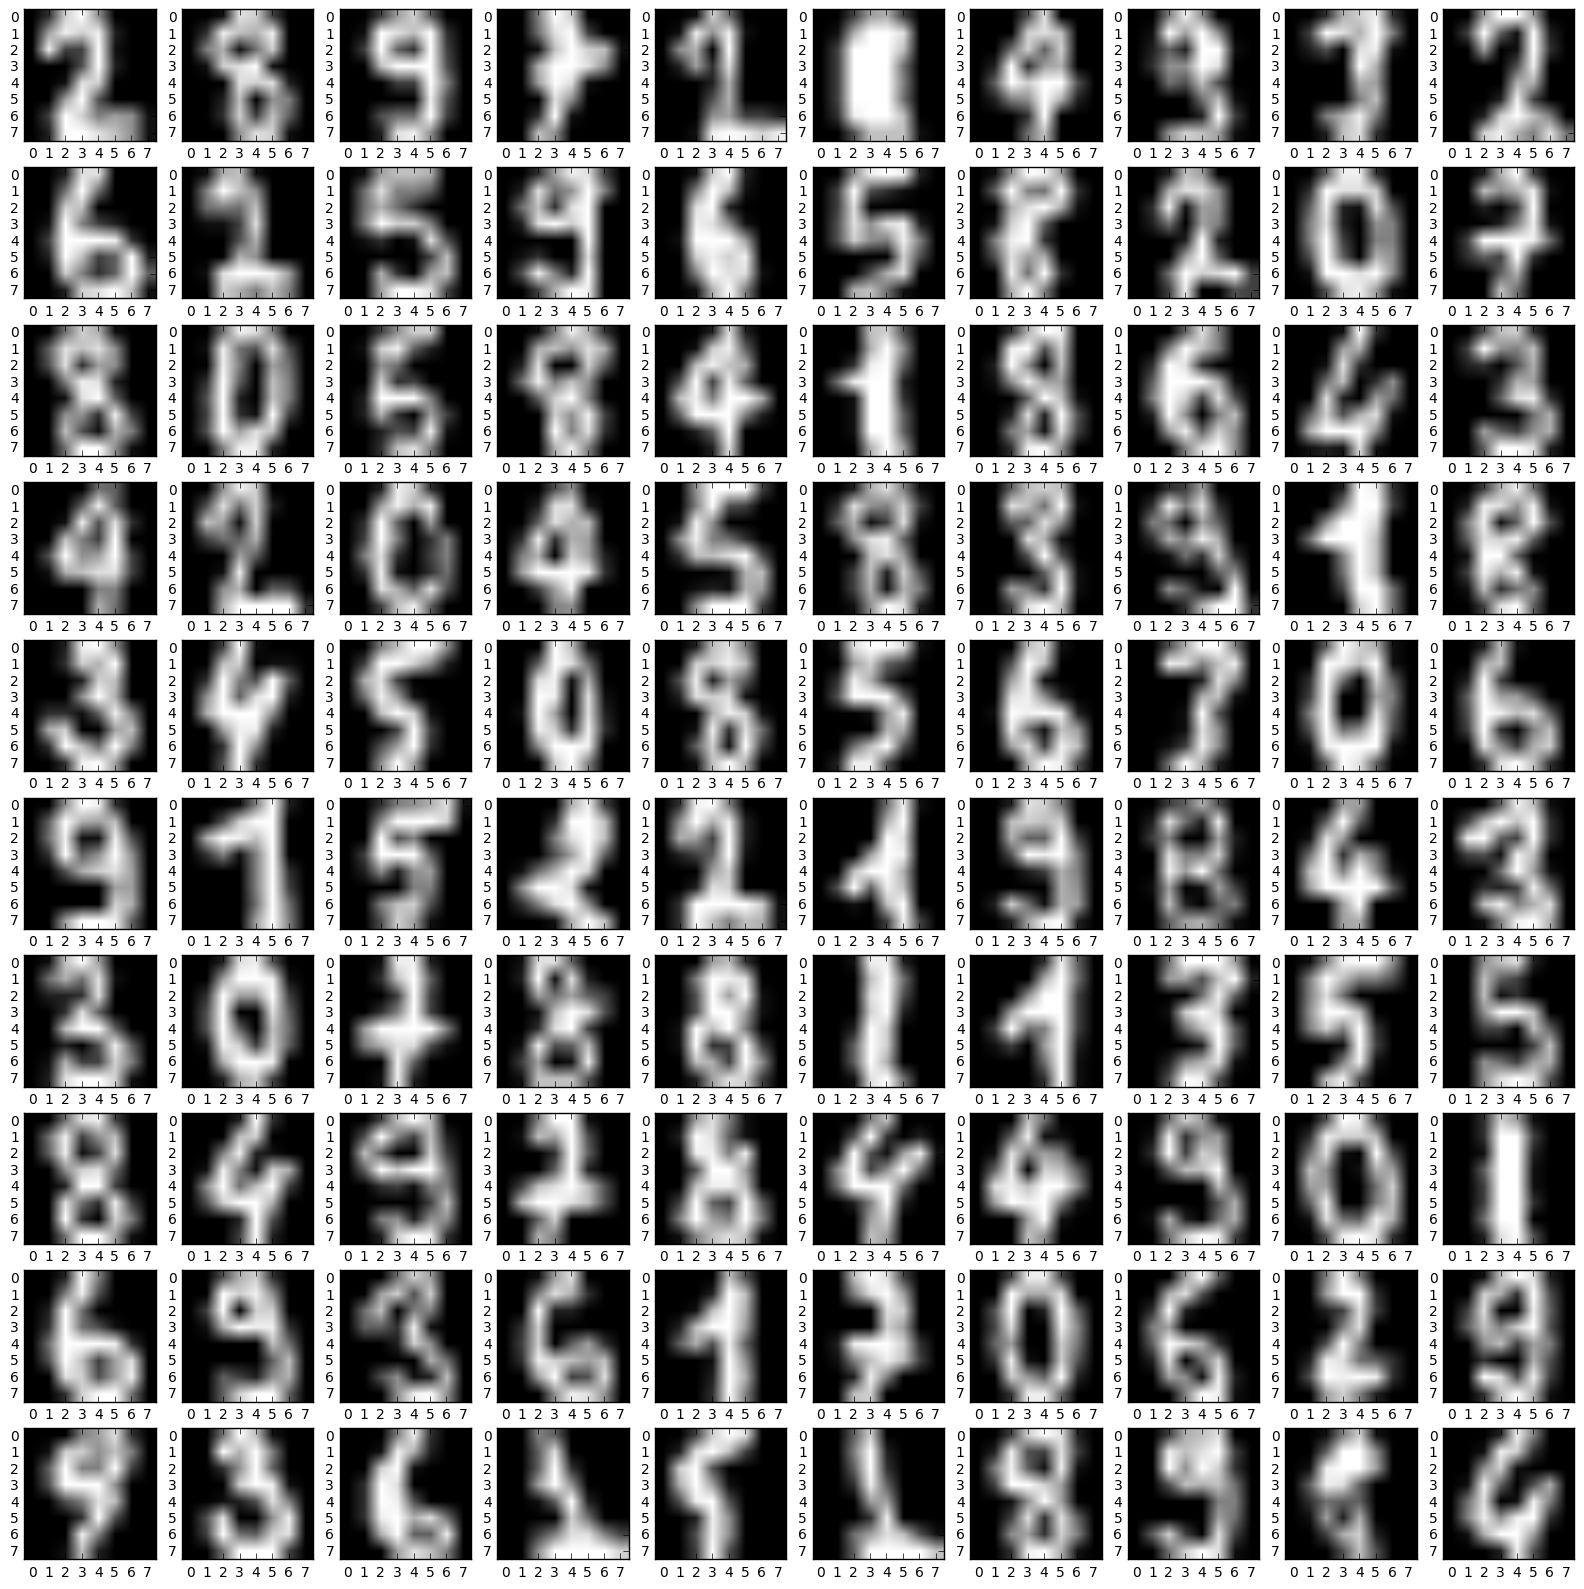

In [42]:


show_size = 10
total = 0
plt.figure(figsize=(20,20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(Xtrain[total], show_size, show_size, total+1)
        total+=1
plt.show()



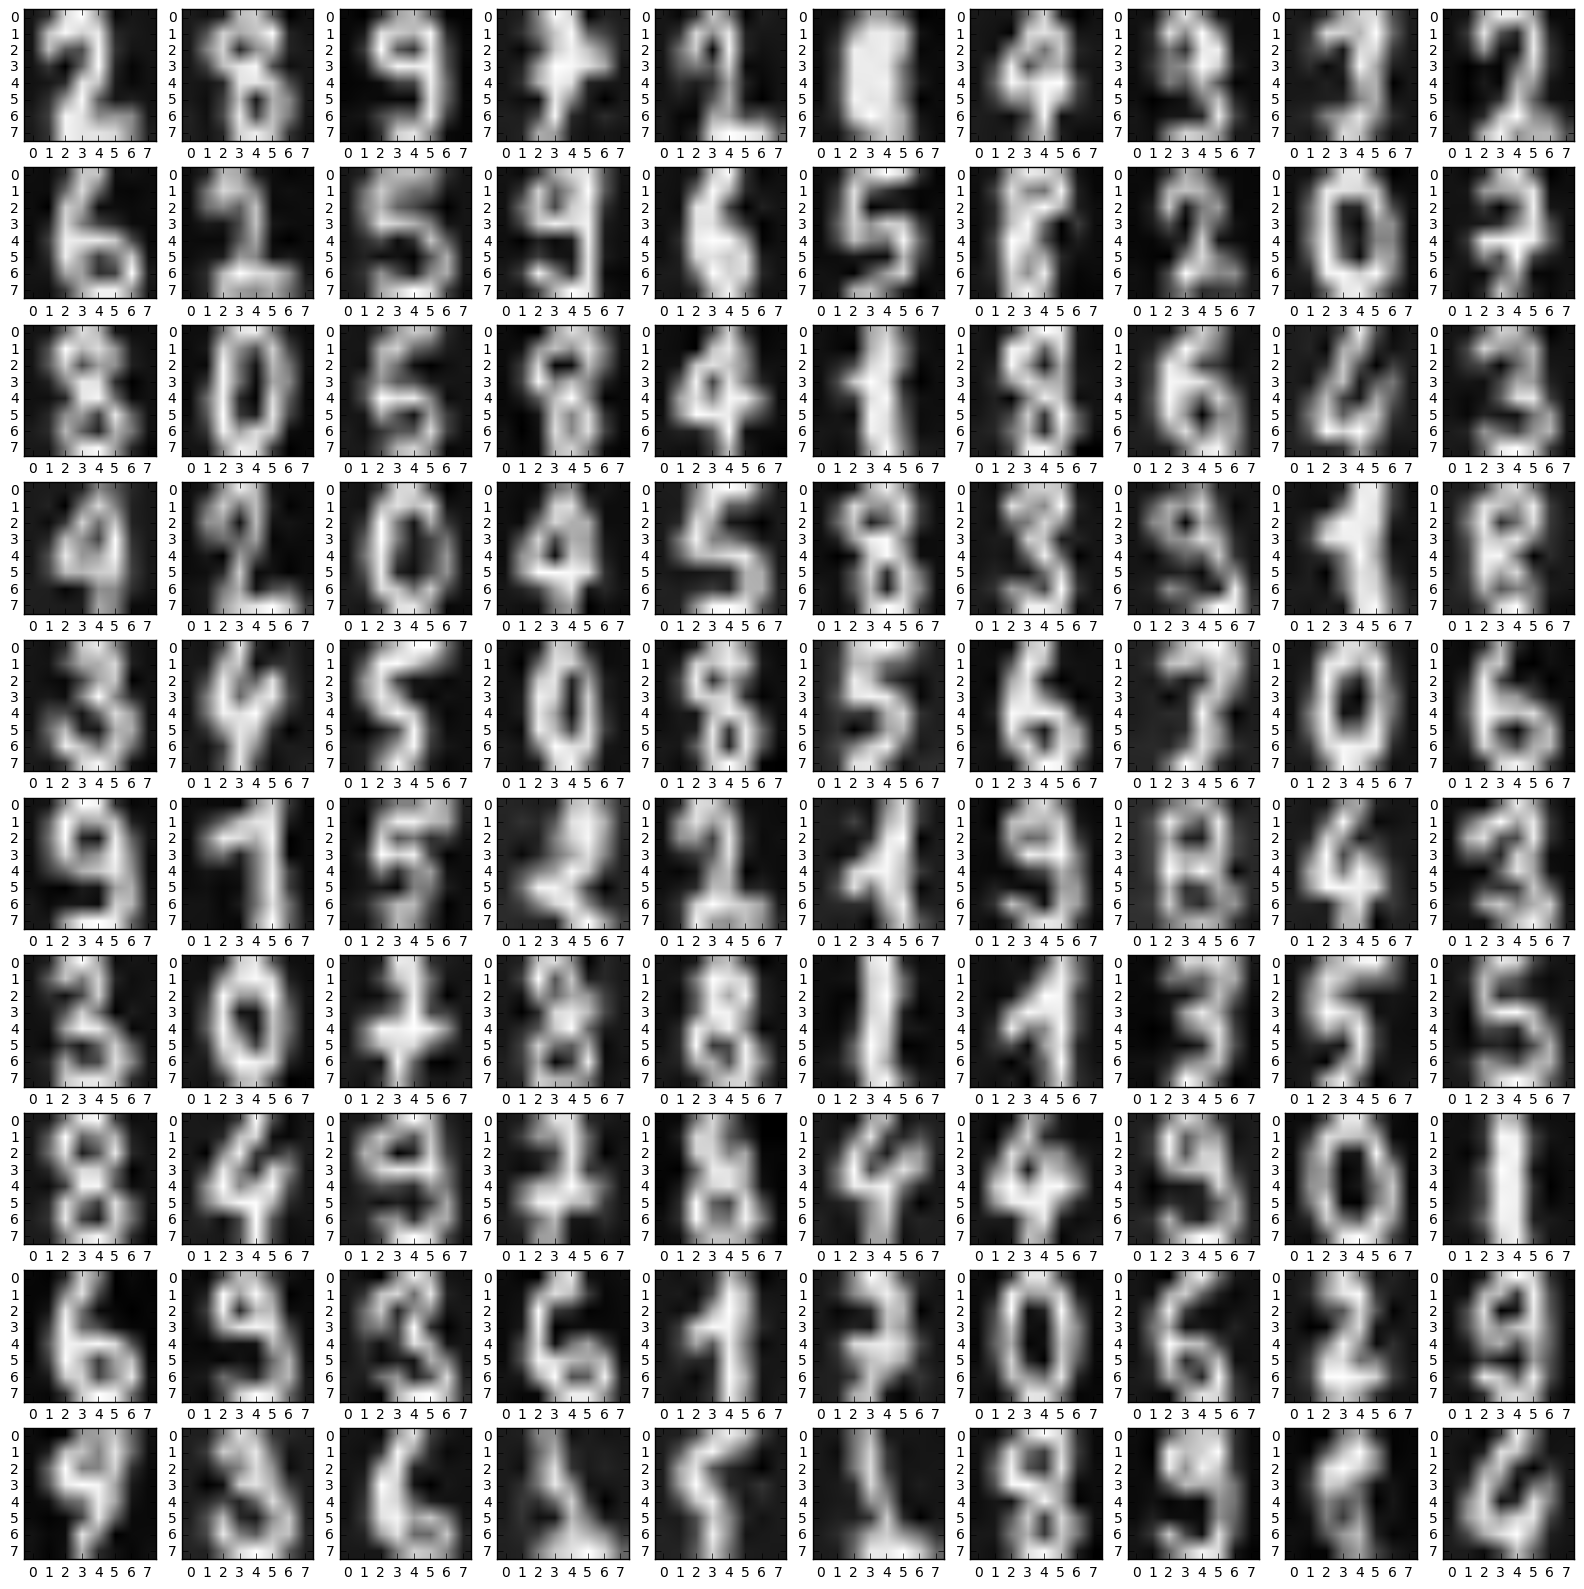

In [46]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])

last_outputs = get_layer_output([Xtrain[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20,20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

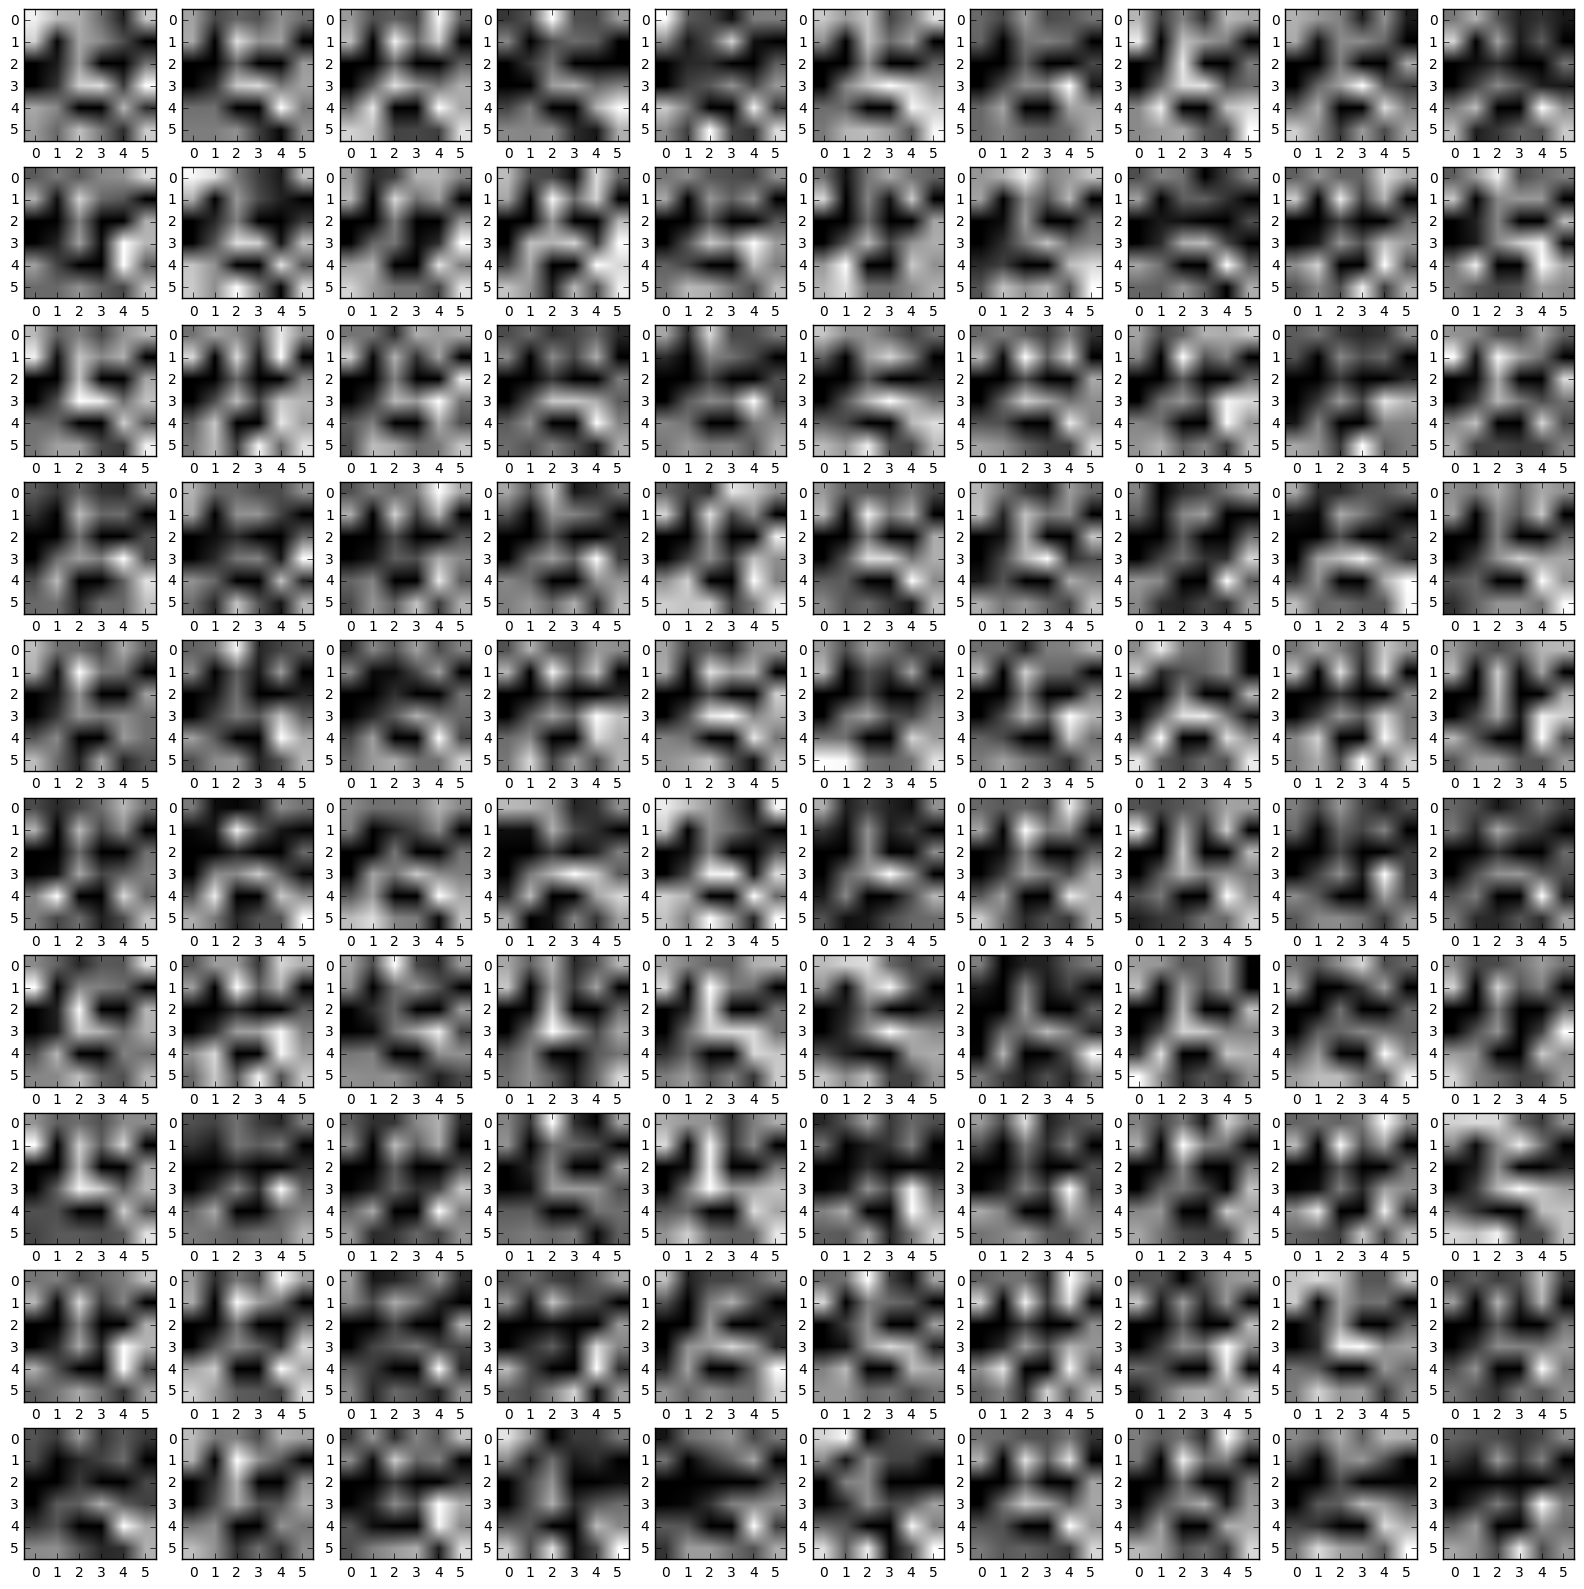

In [58]:


get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

hidden_outputs = get_layer_output([Xtrain[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20,20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()



array([[  7.34442663,   6.08330774,   9.56731224, ...,   0.        ,
          6.93178844,   7.23107243],
       [ 13.47029972,   6.97498655,   8.94490814, ...,   0.        ,
         12.89892101,  10.27386093],
       [ 16.63200951,  11.98188877,   5.43780184, ...,   0.        ,
         18.18600273,  20.95861435],
       ..., 
       [ 10.01567459,  10.66121483,   7.54287052, ...,   0.        ,
         19.99965286,  23.6398468 ],
       [ 21.97969818,   3.81127286,   5.16577816, ...,   0.        ,
         16.69382858,  10.98064518],
       [ 17.06832123,  16.05999565,   3.85082412, ...,   0.        ,
         27.31243706,  16.44514275]], dtype=float32)

In [53]:
hidden_outputs[0]

array([  7.34442663,   6.08330774,   9.56731224,   4.87504816,
         3.90608954,   6.36787224,   7.09435081,   8.47784805,
        19.13625526,  25.90250587,   7.00616312,  13.09860325,
        12.52717781,  27.59886742,   4.44385624,   0.        ,
        23.308918  ,   2.8571384 ,  23.09873199,   9.01115513,
        19.12952614,  15.09775448,   9.25673676,   3.05476165,
        14.14379787,  23.85212326,  14.54938126,   8.60317993,
        26.18332672,   0.        ,   6.93178844,   7.23107243], dtype=float32)

In [54]:
plt.imshow(hidden_outputs[0].reshape(, 10))
plt.gray()

ValueError: total size of new array must be unchanged